In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import itertools


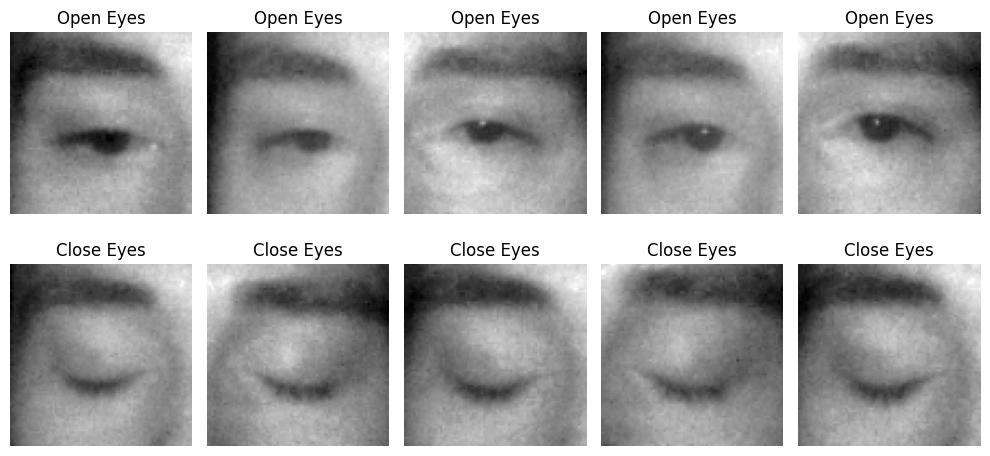

In [2]:
# Define data directories
data_dir = "data/"
open_eye_dir = os.path.join(data_dir, 'Open-Eyes')
close_eye_dir = os.path.join(data_dir, 'Close-Eyes')

# Display some sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
open_eye_images = os.listdir(open_eye_dir)[:5]
close_eye_images = os.listdir(close_eye_dir)[:5]

for i, img in enumerate(open_eye_images):
    img_path = os.path.join(open_eye_dir, img)
    axes[0, i].imshow(plt.imread(img_path), cmap='gray')
    axes[0, i].set_title("Open Eyes")
    axes[0, i].axis('off')

for i, img in enumerate(close_eye_images):
    img_path = os.path.join(close_eye_dir, img)
    axes[1, i].imshow(plt.imread(img_path), cmap='gray')
    axes[1, i].set_title("Close Eyes")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [3]:
batch_size = 32
img_size = (64, 64)  # Resize images for uniformity

train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

plot_model(model, to_file="cnn_model_architecture.png", show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [10]:
!pip install pydot

DEPRECATION: Loading egg at c:\python311\lib\site-packages\allennlp-2.10.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\base58-2.1.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\filelock-3.7.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\lmdb-1.4.1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacem

In [6]:
!pip install graphviz


DEPRECATION: Loading egg at c:\python311\lib\site-packages\allennlp-2.10.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\base58-2.1.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\filelock-3.7.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\lmdb-1.4.1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacem

In [9]:
!pip install pygraphviz

  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz


DEPRECATION: Loading egg at c:\python311\lib\site-packages\allennlp-2.10.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\base58-2.1.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\filelock-3.7.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\lmdb-1.4.1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacem

In [13]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

plot_model(model, to_file="cnn_model_architecture.png", show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [14]:
import pydot
print(pydot.find_graphviz())


AttributeError: module 'pydot' has no attribute 'find_graphviz'

In [5]:
epochs = 10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/10


C:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2123/2123 ━━━━━━━━━━━━━━━━━━━━ 508s 238ms/step - accuracy: 0.8945 - loss: 0.2469 - val_accuracy: 0.9218 - val_loss: 0.2050
Epoch 2/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 415s 196ms/step - accuracy: 0.9769 - loss: 0.0704 - val_accuracy: 0.9233 - val_loss: 0.2188
Epoch 3/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 223s 105ms/step - accuracy: 0.9818 - loss: 0.0537 - val_accuracy: 0.9370 - val_loss: 0.1547
Epoch 4/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 60s 28ms/step - accuracy: 0.9856 - loss: 0.0424 - val_accuracy: 0.9346 - val_loss: 0.1624
Epoch 5/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 1548s 730ms/step - accuracy: 0.9877 - loss: 0.0370 - val_accuracy: 0.9069 - val_loss: 0.3345
Epoch 6/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 132s 62ms/step - accuracy: 0.9885 - loss: 0.0343 - val_accuracy: 0.9072 - val_loss: 0.3939
Epoch 7/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 53s 25ms/step - accuracy: 0.9888 - loss: 0.0322 - val_accuracy: 0.9094 - val_loss: 0.2584
Epoch 8/10
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 53s 25ms/step - accuracy: 0.9896 - 

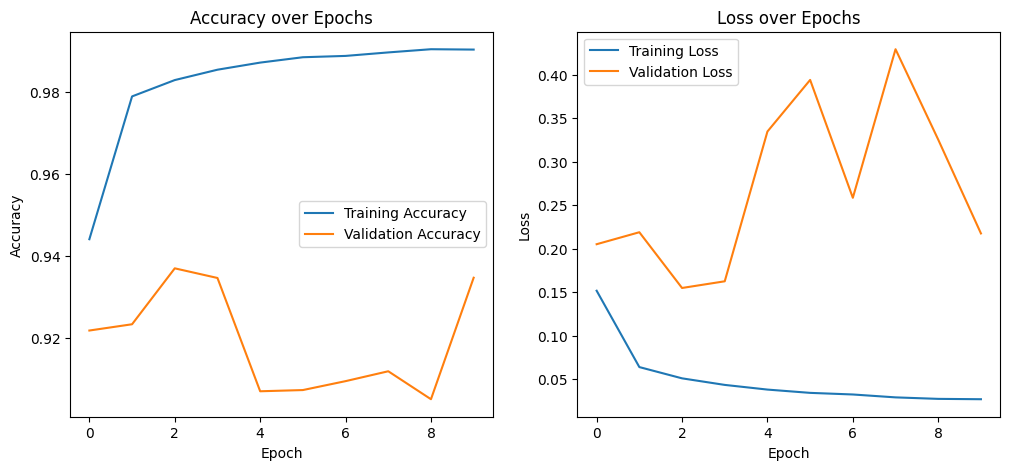

In [8]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


531/531 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step
              precision    recall  f1-score   support

  Close-Eyes       0.50      0.52      0.51      8389
   Open-Eyes       0.51      0.48      0.50      8590

    accuracy                           0.50     16979
   macro avg       0.50      0.50      0.50     16979
weighted avg       0.50      0.50      0.50     16979



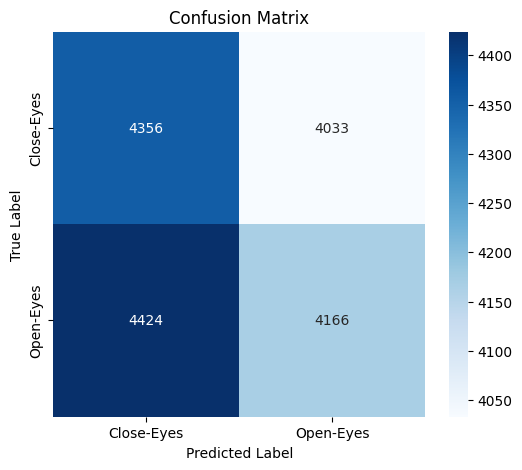

In [9]:
# Generate predictions
validation_generator.reset()
predictions = model.predict(validation_generator)
predictions = (predictions > 0.5).astype(int).flatten()  # Binarize predictions

# True labels
true_labels = validation_generator.classes

# Classification report
print(classification_report(true_labels, predictions, target_names=['Close-Eyes', 'Open-Eyes']))

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Close-Eyes', 'Open-Eyes'], yticklabels=['Close-Eyes', 'Open-Eyes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [10]:
model.save("drowsiness_detection_model.h5")


In [1]:
!pip install flask

   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ------------ --------------------------- 30.7/101.7 kB ? eta -:--:--
   ------------ --------------------------- 30.7/101.7 kB ? eta -:--:--
   ----------------------- --------------- 61.4/101.7 kB 465.5 kB/s eta 0:00:01
   -------------------------------------- 101.7/101.7 kB 586.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/224.5 kB ? eta -:--:--
   -------------- ------------------------- 81.9/224.5 kB 2.3 MB/s eta 0:00:01
   -------------------- ------------------- 112.6/224.5 kB 3.3 MB/s eta 0:00:01
   ------------------------------------ --- 204.8/224.5 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 224.5/224.5 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


DEPRECATION: Loading egg at c:\python311\lib\site-packages\allennlp-2.10.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\base58-2.1.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\filelock-3.7.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python311\lib\site-packages\lmdb-1.4.1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacem

In [1]:
import cv2

# Load Haar Cascade for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def get_eye_region(frame):
    # Convert to grayscale for face/eye detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        face_roi = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_roi, 1.1, 4)
        for (ex, ey, ew, eh) in eyes:
            eye_region = face_roi[ey:ey+eh, ex:ex+ew]
            return cv2.resize(eye_region, (64, 64))  # Resize to model's input size
    
    return None


In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import winsound

# Load the trained model
model = load_model("drowsiness_detection_model.h5")

# Define a function to process each frame
def process_frame(frame):
    # Convert to RGB and resize to model's expected input size
    frame_resized = cv2.resize(frame, (64, 64))
    img_array = img_to_array(frame_resized)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
    return img_array

# Initialize the video capture (0 for the default camera)
cap = cv2.VideoCapture(1)

# Define threshold for drowsiness detection over frames
closed_eye_frames = 0
drowsy_threshold = 15  # Number of consecutive frames with closed eyes to consider drowsy

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale and adjust contrast
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    contrast_img = cv2.equalizeHist(gray)


    # Get the eye region from the frame
    eye_region = get_eye_region(frame)
    if eye_region is not None:
        # Process eye region for prediction
        img_array = img_to_array(eye_region) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)

        if prediction[0][0] < 0.5:
            status = "Drowsy (Eyes Closed)"
            closed_eye_frames += 1
        else:
            status = "Active (Eyes Open)"
            closed_eye_frames = 0

        if closed_eye_frames >= drowsy_threshold:
            alert = "ALERT: Drowsy"
            color = (0, 0, 255)
            winsound.Beep(1000, 500)
        else:
            alert = "Active"
            color = (0, 255, 0)

        # Display results
        cv2.putText(frame, status, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        cv2.putText(frame, alert, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    cv2.imshow("Drowsiness Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

